# Audio

In [11]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as play_audio 

Sample rate (fs): 44100 Hz
Duration: 6.81 seconds
Shape: (300143, 2)
Array type: float64


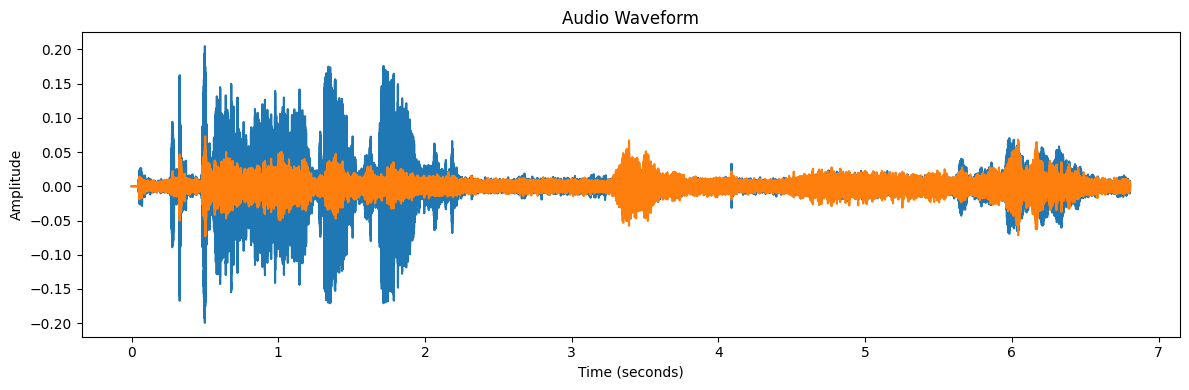

In [13]:
def get_audio(file_path):

    data, fs = sf.read(file_path)

    duration = len(data)/fs

    return fs, duration, data


# Example usage
path = "sounds/nature.mp3"  # Replace this with your actual file path
fs, duration, data = get_audio(path)

print(f"Sample rate (fs): {fs} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Shape: {data.shape}")
print(f"Array type: {data.dtype}")
"""print(f"Mono Shape: {data_mono.shape}")
print(f"Array type: {data_mono.dtype}")"""

# Plot the audio waveform
plt.figure(figsize=(12, 4))
t = np.arange(0, len(data)) / fs
plt.plot(t, data)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [17]:
# Reproducir la señal de audio 
play_audio(data.T, rate=fs)

In [18]:
data_mono = np.mean(data, axis=1)
play_audio(data_mono.T, rate=fs)

/home/javastral/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/javastral/.local/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


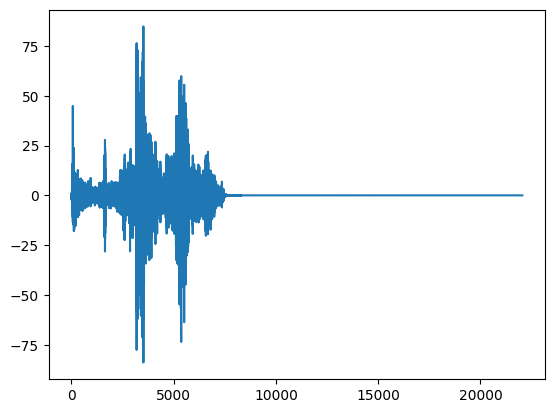

In [21]:
xt = data_mono.copy()

xw = np.fft.rfft(xt)
f = np.fft.rfftfreq(len(xt), 1/fs)

plt.plot(f, xw)

# Espectro

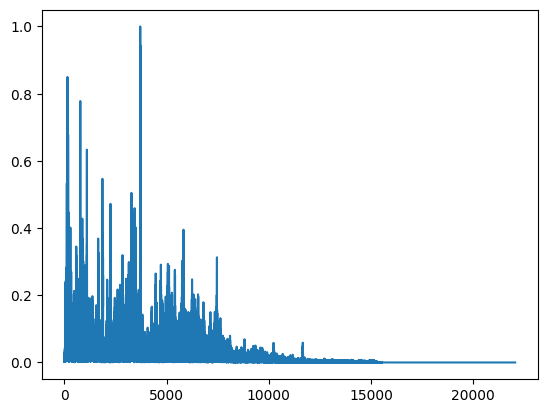

In [29]:
audio = audio_data_mono.copy()

freqs = np.fft.rfftfreq(len(audio), 1/fs)
Xw_og = np.fft.rfft(audio)
Xw = np.abs(Xw_og) / np.max(np.abs(Xw_og))


plt.plot(freqs,Xw)
plt.show()

# Filtrar

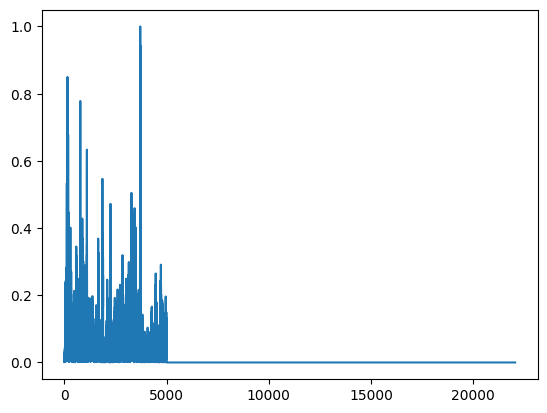

In [30]:
f_cut = 5000
Xw_cut = Xw.copy()

# Obtener el índice de la frecuencia de corte
idx_cut = np.argmax(freqs >= f_cut)

# Filtrar las frecuencias superiores a 5000 Hz
Xw_cut[idx_cut:] = 0

plt.plot(freqs, Xw_cut)
plt.show()

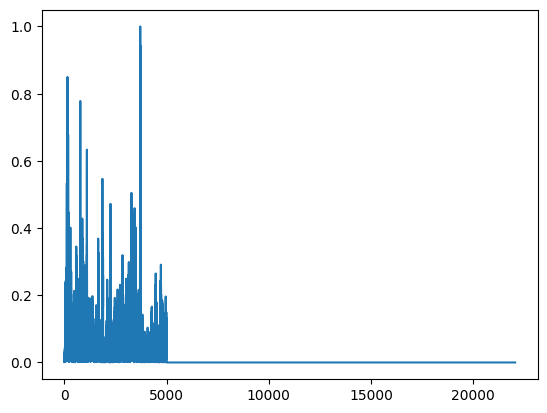

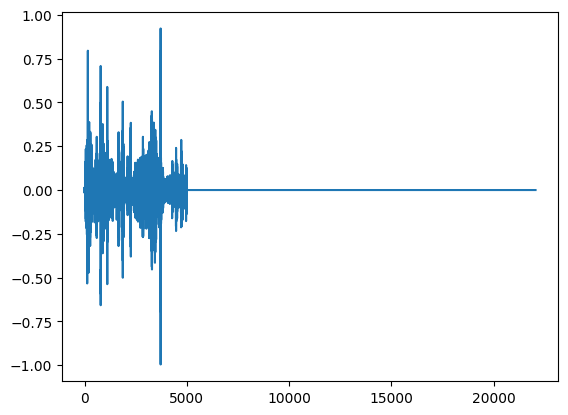

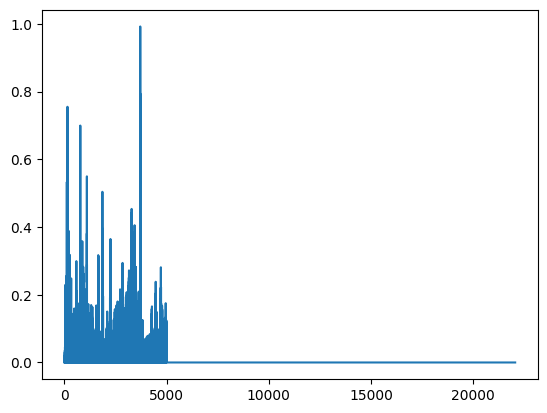

In [43]:
Xw_cos = Xw_cut.copy()

Xw_cos = Xw_cos * np.cos(2 * np.pi * freqs)
Xw_cos_cos = Xw_cos * np.cos(2 * np.pi * freqs)

plt.plot(freqs, Xw_cut)
plt.show()
plt.plot(freqs, Xw_cos)
plt.show()
plt.plot(freqs, Xw_cos_cos)
plt.show()

In [ ]:
audio_cut = np.fft.irfft(Xw_cut)
audio_cut_cos = np.fft.irfft(Xw_cos)
audio_cut_reconstruct = np.fft.irfft(Xw_cos_cos)


